In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# Task - K Nearest Neighbor

In [13]:
random.seed(777)
scat_X = np.array(list(random.randint(-1000, 1000) for _ in range(1000)))
scat_Y = np.array(list(random.randint(-1000, 1000) for _ in range(1000)))
# You might need to do some reshape and stack here...

data=np.array([scat_X,scat_Y])
X=data[0]
Y=data[1]

### 使用grid()函數就可以畫出格線

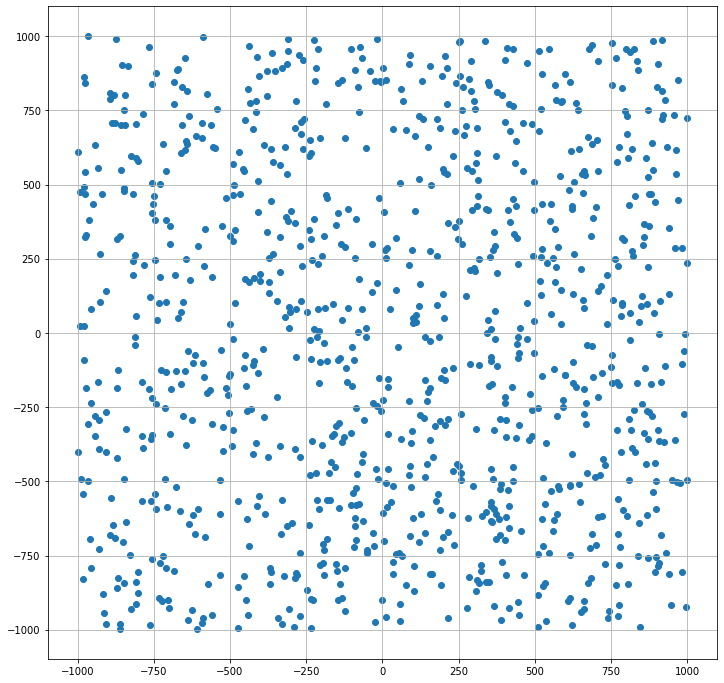

In [14]:
%matplotlib inline
plt.figure(figsize = (12, 12))

plt.grid()
plt.scatter(X,Y)    # Put the "X" and "Y" in the scatter plot function...
# How to make the ＂格線＂ of X and Y the same length...? Google might help!

### 使用迴圈計算原點到所有點的距離，距離小於r就把該點放入list內並回傳

In [15]:
def radius(data, r):
    result = []
    d=np.array([0,0])
    for i in range(len(data[0])):
        e=data[:,i]
        dist=math.sqrt(np.power(d-e,2).sum())
        if (dist<=r):
            result.append(list(e))
    return result

### 將剛剛回傳的list轉換為array，並帶入作圖

In [16]:
q1=radius(data, 1000)
q2=np.array(q1)

m = np.asmatrix(q2)
m = m.transpose()

x=np.array(m[0])
y=np.array(m[1])

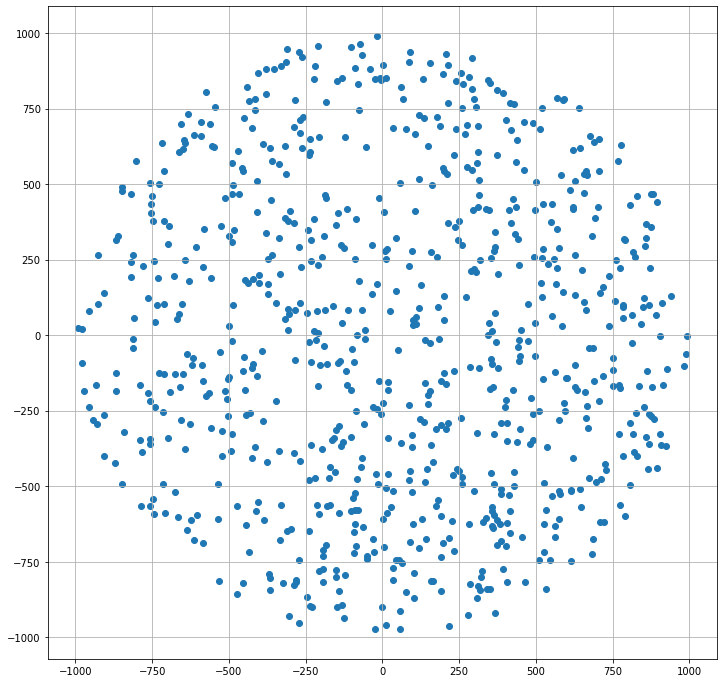

In [17]:
%matplotlib inline
plt.figure(figsize = (12, 12))

plt.grid()
plt.scatter(x,y)
plt.show()

### 運用雙層迴圈計算出點與點之間距離的平方

In [18]:
dist_sq=[]
num=m.shape[1]
for i in range(num):
    a1=m[:,i]
    list_=[]
    for j in range(num):
        a2=m[:,j]
        dist=np.power(a1-a2,2).sum()
        list_.append(dist)
    dist_sq.append(list_)
    
dist_sq=np.array(dist_sq)

In [19]:
print(dist_sq)

[[      0  210825  282098 ... 3074906 3018280 3020445]
 [ 210825       0   30977 ... 2217113 2390869 1796418]
 [ 282098   30977       0 ... 1739088 1878130 1471157]
 ...
 [3074906 2217113 1739088 ...       0   90634  462437]
 [3018280 2390869 1878130 ...   90634       0  936505]
 [3020445 1796418 1471157 ...  462437  936505       0]]


### np.argsort()函式可以直接sort所有要素，並顯示每一個要素原本的index

In [20]:
nearest=np.argsort(dist_sq)

In [21]:
print(nearest)

[[  0  55  29 ... 599 278 614]
 [  1 639 252 ... 505 609 253]
 [  2 676 261 ...  31 609 253]
 ...
 [787 738 643 ...  55 740 618]
 [788 373 557 ... 546 134 535]
 [789 295  19 ... 523 194 629]]


### nearest_partition()函數用來回傳與每個點距離最接近的K個點，使用index形式回傳

In [22]:
def nearest_partition(dist_sq, K):
    num=dist_sq.shape[1]
    nearest=list(np.argsort(dist_sq))
    for i in range(num):
        nearest[i]=nearest[i][0:K+1]
    return nearest

In [23]:
nearest=nearest_partition(dist_sq, 3)

### 根據nearest_partition()函數回傳的list，此處要把每一個點與最接近的K個點連起來，使用雙重迴圈的方式。

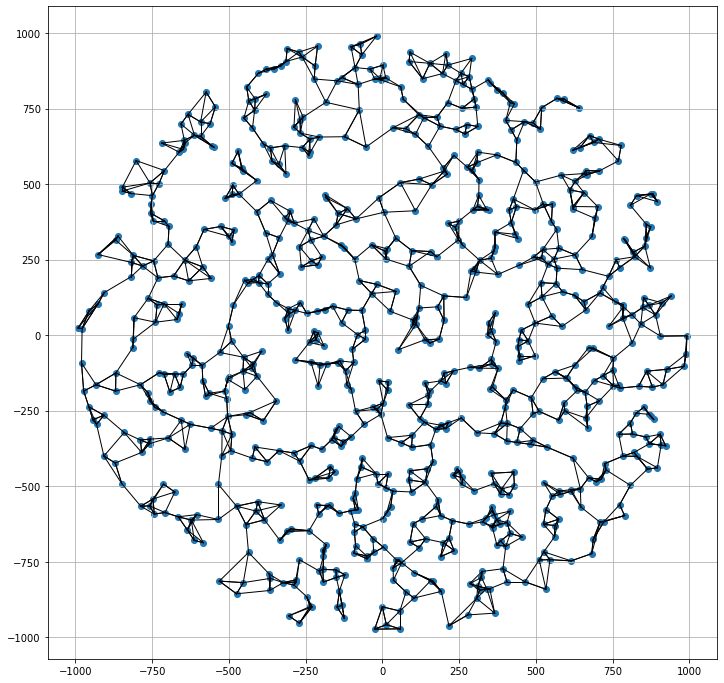

In [24]:
K = 3

%matplotlib inline
plt.figure(figsize = (12, 12))
plt.grid()
plt.scatter(x,y,zorder=1)

num=dist_sq.shape[1]
for i in range(num):
    # nearest中每一個row代表一個點，包含了與該點K個最接近的點
    n=nearest[i]
    # 將每個點與最接近的K個點連起來，使用迴圈重複執行
    for j in range(K):
        n1=[n[0],n[j+1]]
        plt.plot(x[0][n1],y[0][n1],color='black',zorder=2,linewidth=1)
plt.show()